# Latency Model for the RADOS Simulator
The latency model `latModel` has two components: one for converting request size into latency and another one to add compaction delays drawn from a heavy-tailed distribution (e.g. `random.lognormvariate(mu, sigma)`). See `scripts/radossim.py` for more details.

In [ ]:
# Basic parameters
runs = 11

# latModel parameters (Fit those to an actual BlueStore deployment!)

# Log fitting for IO sizes > 64KB
lgMult = 820.28
lgAdd = -1114.3

# Linear fitting for IO sizes <= 64KB
smMult = 62.36
smAdd = 8.33

# Lognormal fitting to "In each second, at least 10 x 60ms are spent
# with the drive being blocked [skourtis:inflow13, Fig 4]"
mu = 2
sigma = 2

# Test for larger parameters
test_list = []


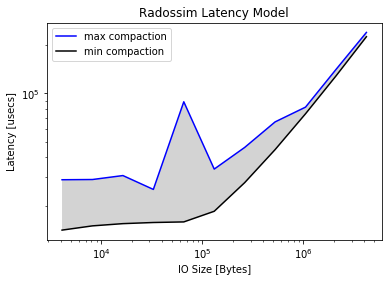

In [27]:
import scripts.radossim as sim
import matplotlib
import matplotlib.pyplot as plt


x = []
y_min = []
y_max = []
for i in range(runs):
    s = (2**i) * 4096
    x.append(s)
    msmts = []
    for j in range(10000):
        msmts.append(sim.latModel(s, lgMult, lgAdd, smMult, smAdd, mu, sigma))
    y_min.append(min(msmts))
    y_max.append(max(msmts))
    
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(x, y_max, color='blue', label='max compaction')
ax.plot(x, y_min, color='black', label='min compaction')
ax.fill_between(x, y_min, y_max, facecolor='lightgrey')
ax.set(xlabel='IO Size [Bytes]', ylabel='Latency [usecs]', title='Radossim Latency Model')

plt.legend()
plt.show()